In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

### Loading the data

In [4]:
df = pd.read_csv("METR-LA.csv")

### Print the data

In [5]:

print(df.head())
print(df.columns)

            Time     773869     767541     767542     717447     717446  \
0  3/1/2012 0:00  64.375000  67.625000  67.125000  61.500000  66.875000   
1  3/1/2012 0:05  62.666667  68.555556  65.444444  62.444444  64.444444   
2  3/1/2012 0:10  64.000000  63.750000  60.000000  59.000000  66.500000   
3  3/1/2012 0:15   0.000000   0.000000   0.000000   0.000000   0.000000   
4  3/1/2012 0:20   0.000000   0.000000   0.000000   0.000000   0.000000   

      717445  773062  767620     737529  ...     772167  769372     774204  \
0  68.750000  65.125  67.125  59.625000  ...  45.625000  65.500  64.500000   
1  68.111111  65.000  65.000  57.444444  ...  50.666667  69.875  66.666667   
2  66.250000  64.500  64.250  63.875000  ...  44.125000  69.000  56.500000   
3   0.000000   0.000   0.000   0.000000  ...   0.000000   0.000   0.000000   
4   0.000000   0.000   0.000   0.000000  ...   0.000000   0.000   0.000000   

      769806  717590     717592     717595     772168     718141  769373  
0  66

In [27]:
sensor_data = df[["717447"]].copy()
sensor_data.columns = ["Speed"]

In [28]:
print(sensor_data.head())


       Speed
0  61.500000
1  62.444444
2  59.000000
3   0.000000
4   0.000000


In [31]:
def convert_to_table(df, window_size=6):
    X, y = [], []
    speeds = df["Speed"].values
    for i in range(window_size, len(speeds)):
        X.append(speeds[i-window_size:i])
        y.append(speeds[i])
    return np.array(X), np.array(y)    

In [34]:
window_size = 6
X, y = convert_to_table(sensor_data, window_size)

print("Feature shape:", X.shape, "Feature type:", type(X))
print("Label shape:", y.shape, "Label type:", type(y))

Feature shape: (34266, 6) Feature type: <class 'numpy.ndarray'>
Label shape: (34266,) Label type: <class 'numpy.ndarray'>


In [36]:
m = X.shape[0]
train_end = int(m * 0.7)
val_end = int(m * 0.85)

X_train, y_train = X[:train_end], y[:train_end]
X_val, y_val = X[train_end:val_end], y[train_end:val_end]
X_test, y_test = X[val_end:], y[val_end:]

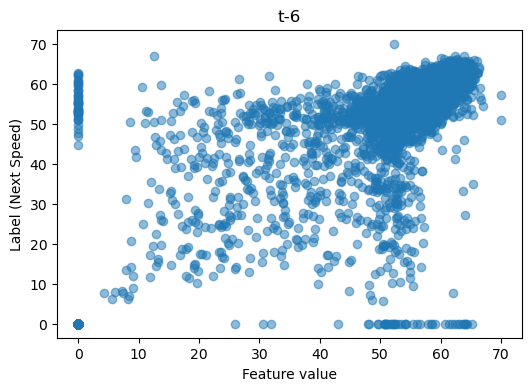

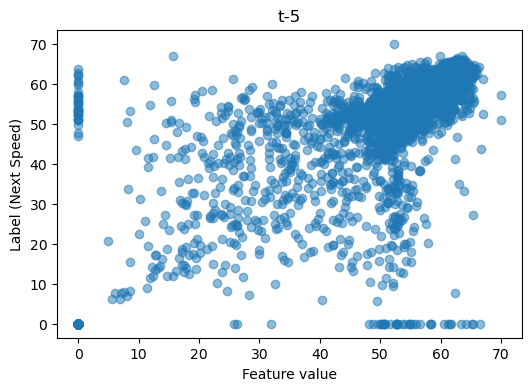

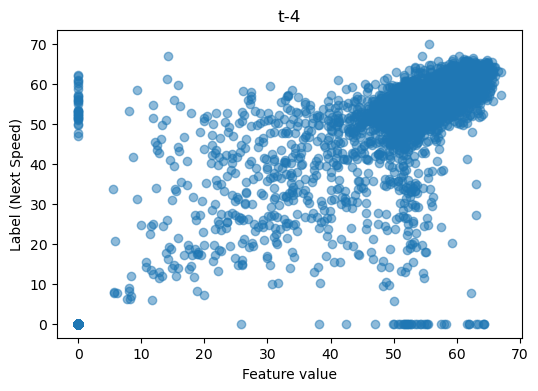

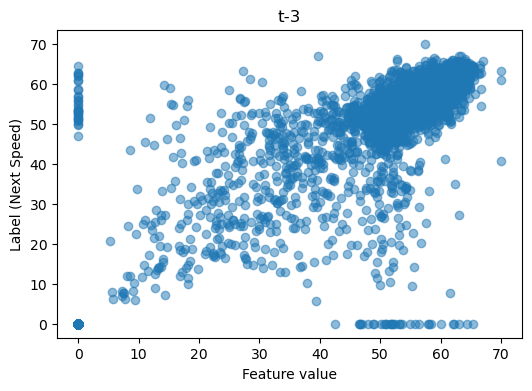

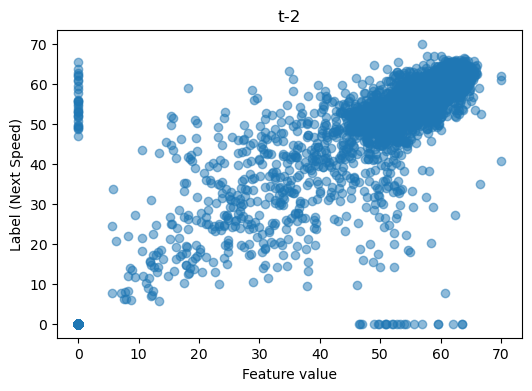

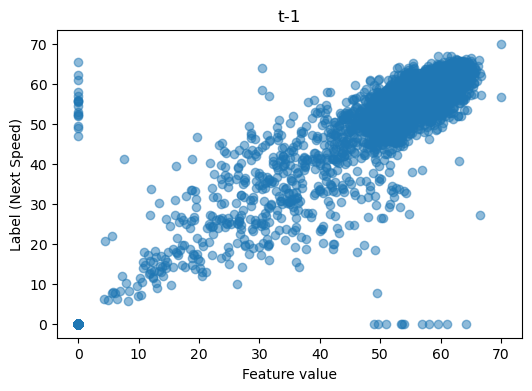

In [42]:
from utils import plot_features_vs_label


feature_names = [f"t-{window_size-i}" for i in range(window_size)]

plot_features_vs_label(X_train, y_train, feature_names=feature_names, sample_size=5000)


In [72]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
X_val_norm = scaler.fit_transform(X_val)
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[70. 70. 70. 70. 70. 70.]
Peak to Peak range by column in Normalized X:[4.63078601 4.63082936 4.63089103 4.63092145 4.63197904 4.63303884]


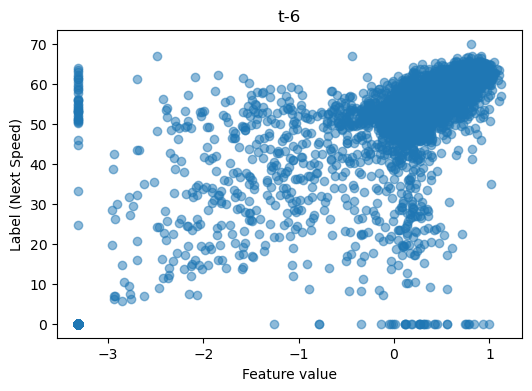

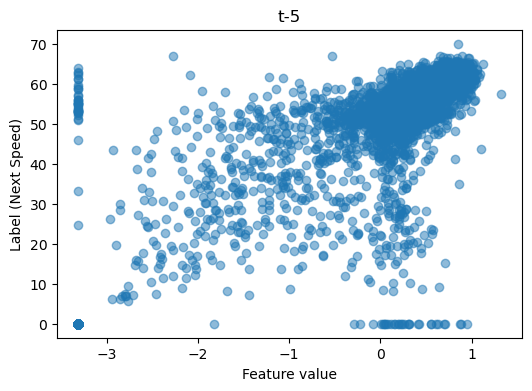

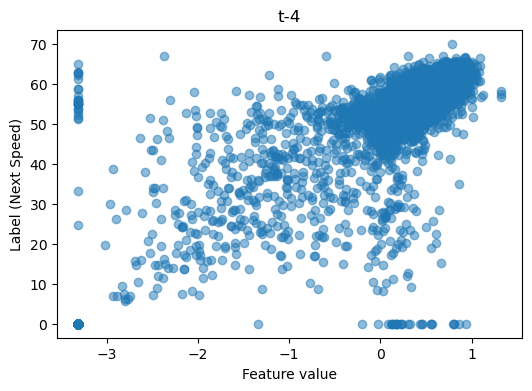

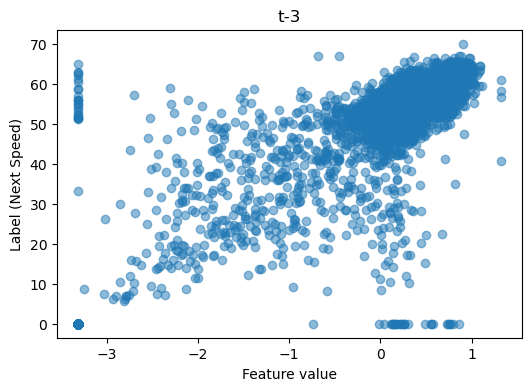

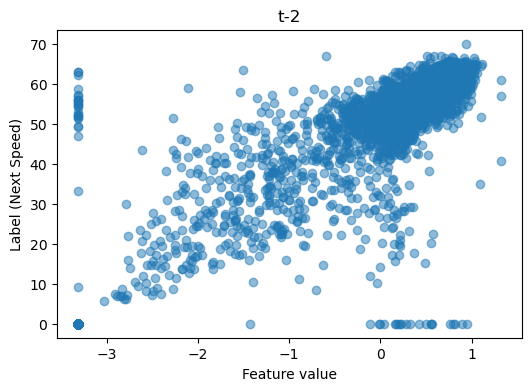

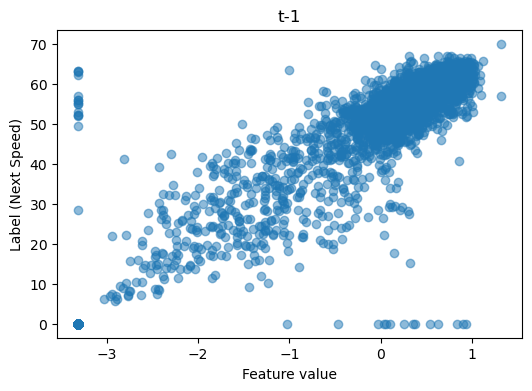

In [51]:
feature_names = [f"t-{window_size-i}" for i in range(window_size)]

plot_features_vs_label(X_norm, y_train, feature_names=feature_names, sample_size=5000)

In [75]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 14, number of weight updates: 335805.0


In [76]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters: w: {w_norm}, b:{b_norm}")

model parameters: w: [ 0.51181281  0.04213794  0.82200845  0.76902587  1.34393422 10.99148162], b:[50.03892964]


In [77]:
y_pred = sgdr.predict(X_val_norm)

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

Prediction on training set:
[41.91021319 35.45308477 35.98979038 38.8334683 ]
Target values 
[62.375 60.5   63.    58.125]


In [78]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_val, y_pred)
print(f"MAE: {mae:.3f}")


MAE: 3.403


In [79]:
from sklearn.metrics import r2_score

r2 = r2_score(y_val, y_pred)
print(f"R²: {r2:.3f}")


R²: 0.852


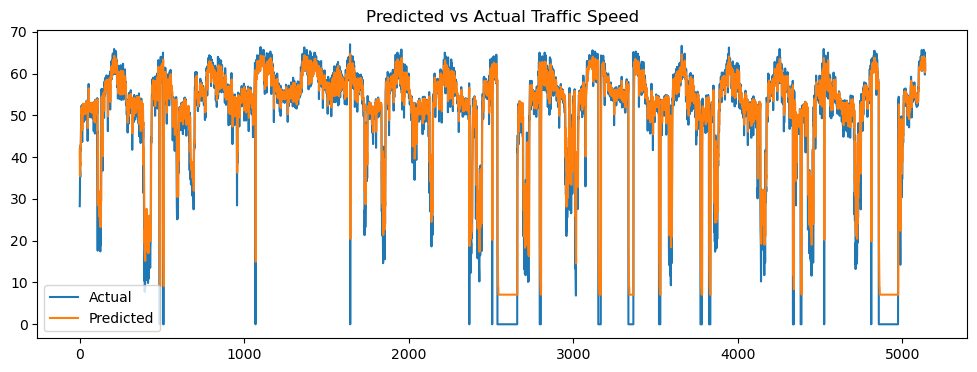

In [84]:

plt.figure(figsize=(12,4))
plt.plot(y_val, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Predicted vs Actual Traffic Speed")
plt.show()


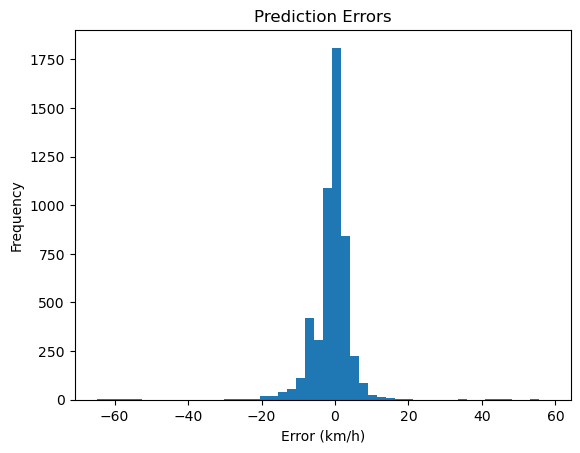

In [85]:
errors = y_val - y_pred
plt.hist(errors, bins=50)
plt.title("Prediction Errors")
plt.xlabel("Error (km/h)")
plt.ylabel("Frequency")
plt.show()
